#                          our task for this dataset- google play store apps data
* App Popularity: Analyze the relationship between Installs, Rating, and Reviews to understand what makes an app popular.
* Price vs Performance: Compare the Price of apps to their Rating and Reviews to see if paid apps perform better than free ones.
* Category-Wise Insights: Categorize apps based on Category and see which categories have the highest-rated apps or the most downloads.
* Size Impact: Study how the Size of apps correlates with Installs or Rating.
* Version Updates: Investigate how frequently apps are updated by analyzing the Last Updated column and how that might affect their ratings.

* work flow
* 1. Data Cleaning
  2. Exploratory Data Analysis (EDA)
  3. Feature Encoding
  4. Normalization/Scaling
  5. conclusion 


# import required libraries 

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# import datasets 

In [21]:
dataset = pd.read_csv("googleplaystore.csv")
dataset2= pd.read_csv("googleplaystore_user_reviews.csv")


# dataset view by .head()

In [4]:
dataset.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [5]:
dataset2.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


# dataset shape

In [6]:
f"(datasets have (rows,columns)     {dataset.shape} {dataset2.shape})"

'(datasets have (rows,columns)     (10841, 13) (64295, 5))'

# checking random data by .sample()

In [7]:
dataset.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
459,Mail.Ru - Email App,COMMUNICATION,4.6,837842,Varies with device,"50,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
6813,BU Bus Tracker,MAPS_AND_NAVIGATION,4.2,57,15M,"10,000+",Free,0,Everyone,Maps & Navigation,"September 5, 2017",2.02,4.1 and up


In [8]:
dataset2.sample(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
4141,Adobe Acrobat Reader,I sure bug what. But people wanted type foreig...,Positive,0.005,0.452778
21365,Calls & Text by Mo+,Good voice quality. Can call sms number worldw...,Positive,0.500,0.800000


# checking missing values 

In [9]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

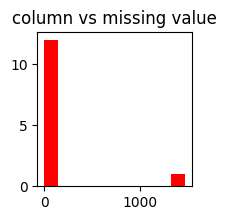

In [10]:
plt.figure(figsize=(2,2),edgecolor="black")
plt.hist(dataset.isnull().sum(),color="red")
plt.title("column vs missing value")
plt.show()

# total missing values in data

In [11]:
dataset.isnull().sum().sum()

1487

* drop missing values or we can replace the values with suitable values 
* but for rating column we cant do that 
* for this case  just drop

In [22]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# analysing datatypes in our dataset  

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


# 12 objects and 1 numerical 

# dataset columns
* App Category
* Rating	
* Reviews size
* Installs
* Type
* Price
* Content
* Rating	Genres
* Last Updated
* Current Ver
* Android Ver

*  but in real , some collums numerical type but in data they are object
*  we can do encoding 

In [24]:
df=dataset # for backup

In [25]:
# Remove commas and plus signs from 'Installs', then convert to int
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Convert 'Size' to numeric after handling units like "M" or "k"
df['Size'] = df['Size'].str.replace('M', 'e6').str.replace('k', 'e3').replace('Varies with device', np.nan).astype(float)

# Remove dollar signs and convert 'Price' to numeric
df['Price'] = df['Price'].str.replace('$', '').astype(float)


In [26]:
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.2+ KB


In [27]:
# Summary statistics for numeric columns
df.describe()




,Rating,Size,Installs,Price
count,9360.000000,7.723000e+03,9.360000e+03,9360.000000
mean,4.191838,2.297046e+07,1.790875e+07,0.961279
std,0.515263,2.344963e+07,9.126637e+07,15.821640
min,1.000000,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,5.300000e+06,1.000000e+04,0.000000
50%,4.300000,1.400000e+07,5.000000e+05,0.000000
75%,4.500000,3.300000e+07,5.000000e+06,0.000000
max,5.000000,1.000000e+08,1.000000e+09,400.000000


In [28]:
# For object (categorical) columns
df.describe(include='object')

,App,Category,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9360,9360,9360,9360,9360,9360,9360,9360,9360
unique,8190,33,5990,2,6,115,1299,2638,31
top,ROBLOX,FAMILY,2,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1746,83,8715,7414,732,319,1415,2059


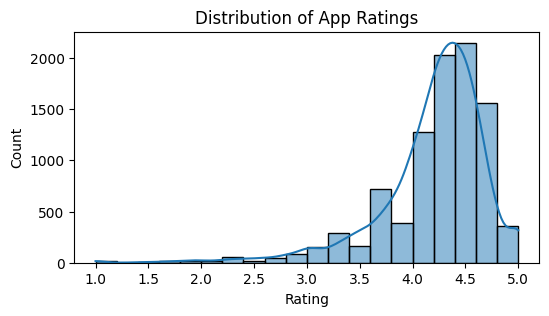

In [29]:
# Histogram for Ratings
plt.figure(figsize=(6,3))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()


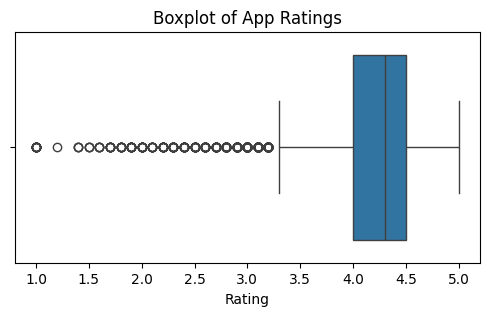

In [30]:
# Boxplot for Ratings
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of App Ratings')
plt.show()


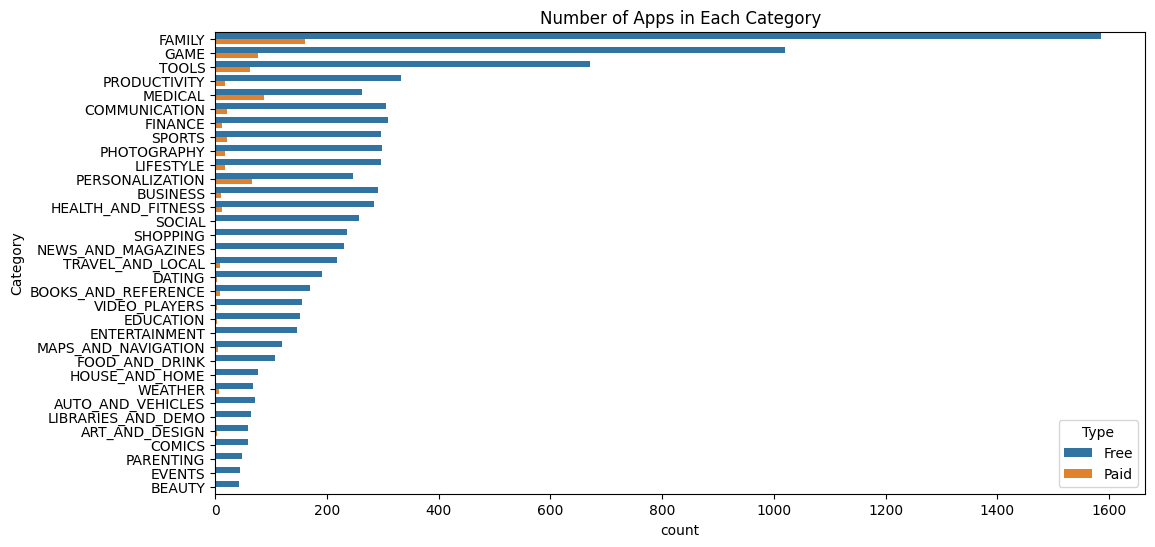

In [31]:
# Countplot for Categories
plt.figure(figsize=(12,6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index,hue=df["Type"])
plt.title('Number of Apps in Each Category')
plt.show()


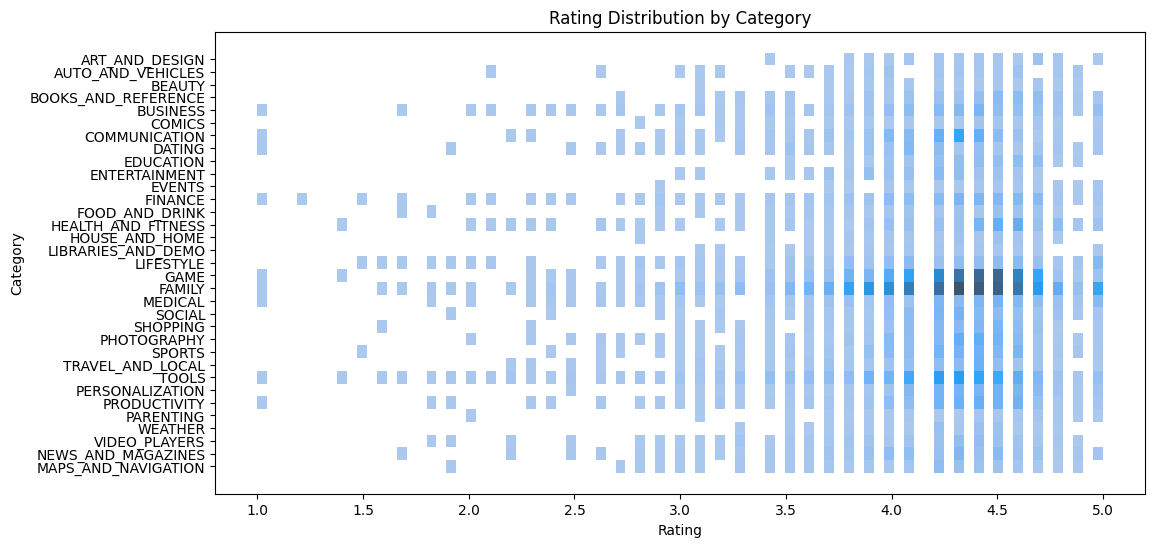

In [32]:
# Boxplot to see distribution of ratings in each category
plt.figure(figsize=(12,6))
sns.histplot(x='Rating', y='Category', data=df)
plt.title('Rating Distribution by Category')
plt.show()


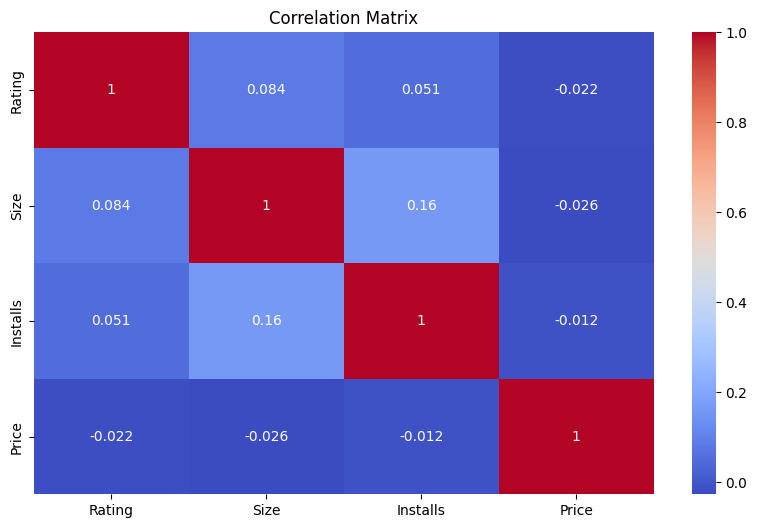

In [33]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[["Rating","Size","Installs","Price"]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

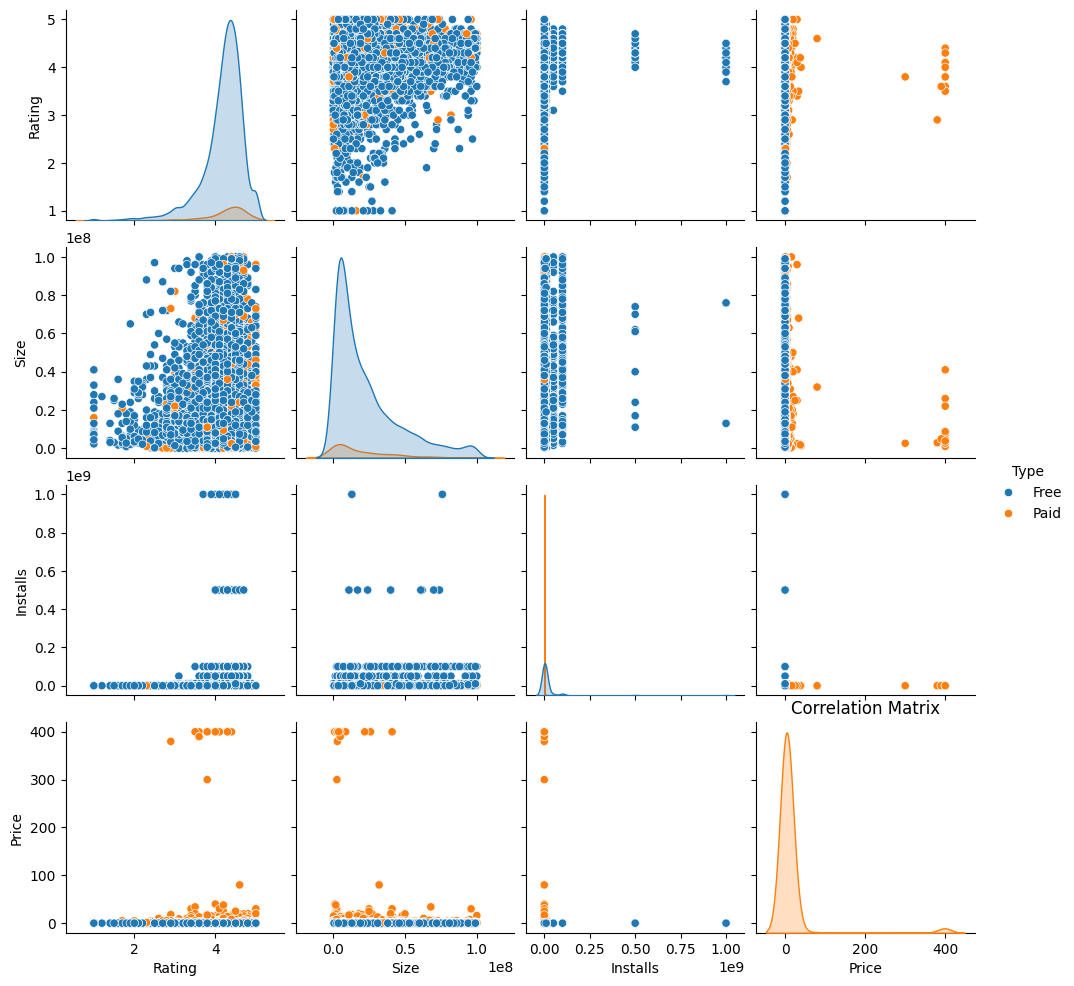

In [34]:
# relation by pair plot 
# free , paid 
sns.pairplot(df,hue="Type")
plt.title('Correlation Matrix')
plt.show()

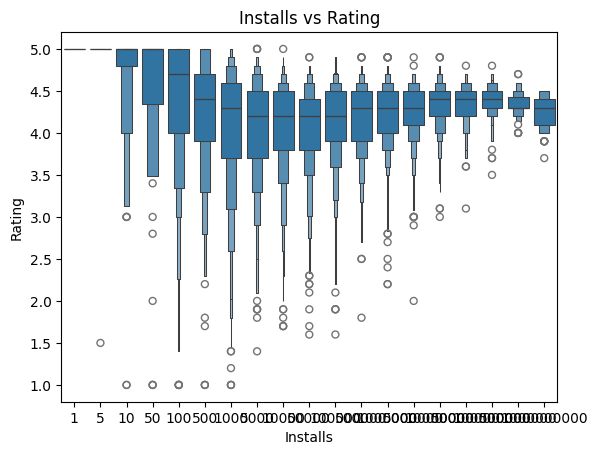

In [45]:
# Scatterplot for Installs vs. Rating
# plt.figure(figsize=(3,4))
sns.boxenplot(x='Installs', y='Rating', data=df)
plt.title('Installs vs Rating')
plt.show()


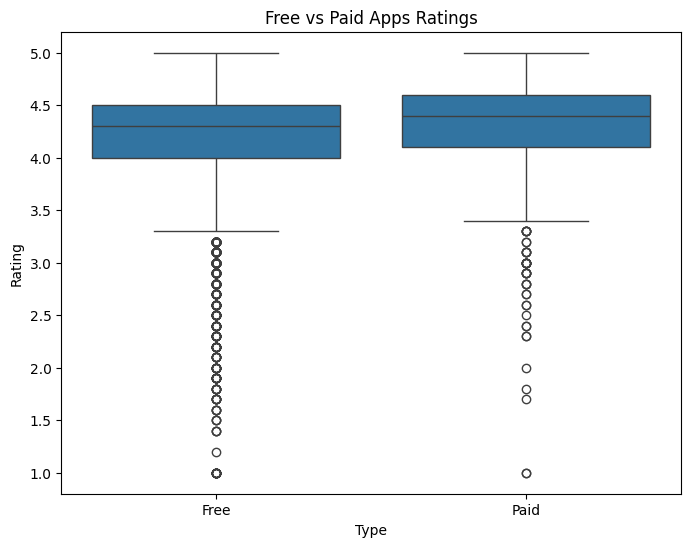

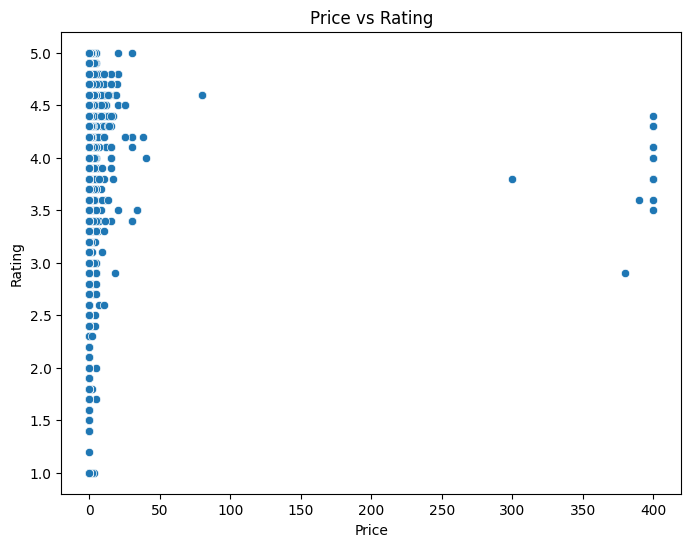

In [53]:
# Boxplot for Price vs Rating (free vs paid)
plt.figure(figsize=(8,6))
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Free vs Paid Apps Ratings')
plt.show()
# Scatterplot for Price vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs Rating')
plt.show()


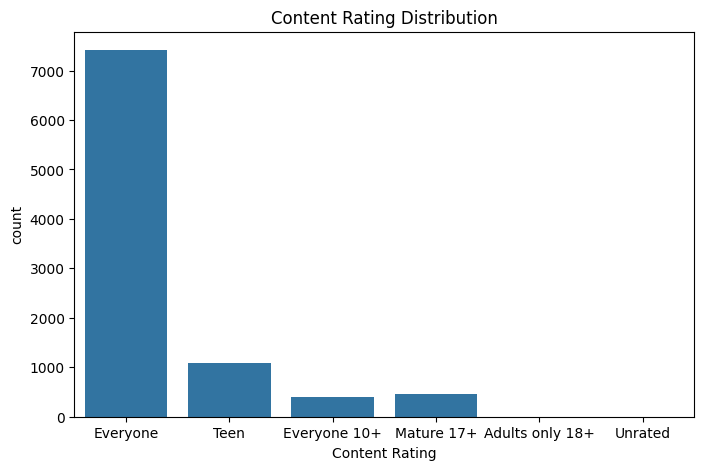

In [54]:
# Countplot for Content Rating
plt.figure(figsize=(8,5))
sns.countplot(x='Content Rating', data=df)
plt.title('Content Rating Distribution')
plt.show()



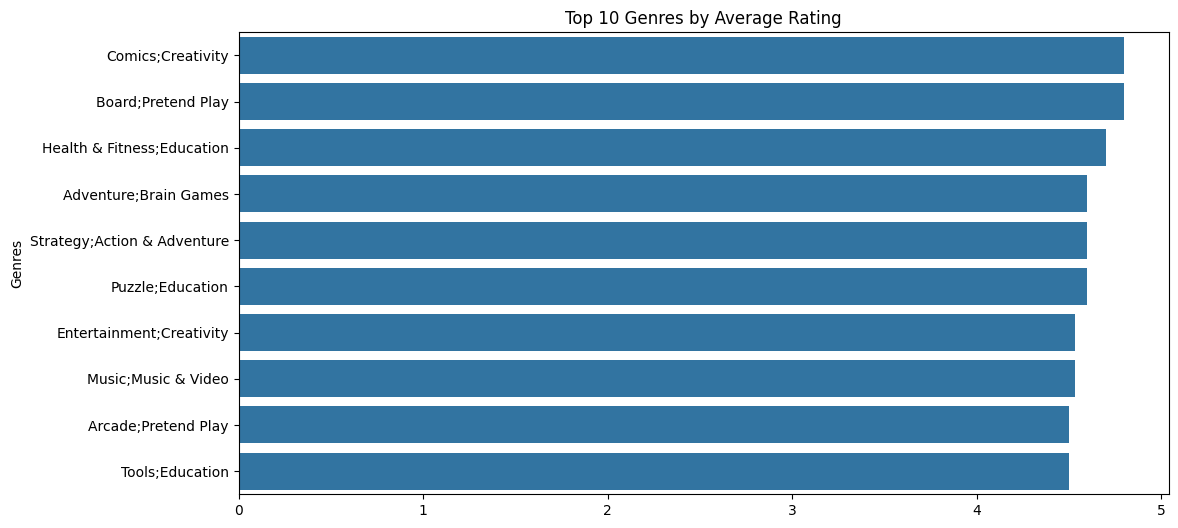

In [55]:
# Average Rating by Genre
df_genre_ratings = df.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(10)

# Barplot for Genres
plt.figure(figsize=(12,6))
sns.barplot(x=df_genre_ratings.values, y=df_genre_ratings.index)
plt.title('Top 10 Genres by Average Rating')
plt.show()


# Encoding Categorical Features

In [56]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'Type' (Free/Paid)
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])


In [57]:
# One-hot encoding 'Category', 'Content Rating', and 'Genres'
df_encoded = pd.get_dummies(df, columns=['Category', 'Content Rating', 'Genres'], drop_first=True)


In [58]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [59]:
# Drop columns that are no longer needed
df.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)


In [60]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,Everyone,Art & Design;Pretend Play


# Conclusion of EDA
* Based on the exploratory data analysis, here are some potential insights and takeaways you might have observed:

* Rating Distribution:

* The majority of apps tend to have ratings between 4.0 and 4.5, with fewer apps having very low or very high ratings.

* There might be some outliers (extremely high or low-rated apps) in the dataset, visible in the boxplot.
Top Categories:

* Categories like "Family", "Games", and "Tools" might dominate the Play Store in terms of app count.

* You may have observed that some categories are much more saturated with apps than others.


* Category vs Rating:

* Different categories might show varied average ratings, indicating that apps in certain categories (like "Education" or "Health & Fitness") tend to be rated higher than others.

* Installs vs Rating:

* There might be a weak or non-linear relationship between the number of installs and the app rating. High installs don't necessarily mean high ratings.

* After applying a log transformation to Installs, the scatterplot might have shown a clearer picture of this relationship.

* Reviews vs Rating:

* The number of reviews may show some correlation with higher ratings, indicating that apps with more engagement could be seen as more trustworthy or popular.

* Price vs Rating:

* Paid apps might have a different rating distribution compared to free apps, with paid apps generally receiving higher ratings.

* There could be outliers in both paid and free apps, with some expensive apps getting low ratings.

* Content Rating:

* Most apps are likely to be rated "Everyone," but there may be differences in average app ratings across different content ratings ("Everyone", "Teen", "Mature 17+").

* Genres:

* Certain genres might have higher average ratings, which could indicate user preference for apps in those categories.

# thanks , notebook by Ayush dwivedi